<img src="https://www.luxonis.com/logo.svg" width="400">

In [ ]:
!pip install datadreamer

In [ ]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
from datadreamer.dataset_annotation import OWLv2Annotator
from datadreamer.image_generation import (
    StableDiffusionTurboImageGenerator,
)
from datadreamer.prompt_generation import LMPromptGenerator


## Prompt generation

In [2]:
# Define objects you want to generate
object_names = ["aeroplane", "car", "person", "unicorn"]
prompt_generator = LMPromptGenerator(
    class_names=object_names,
    prompts_number=10,
    num_objects_range = [1, 2], # How many objects included in a prompt
    seed = 42,
)

2025-02-07 14:30:11.453 | INFO     | datadreamer.prompt_generation.lm_prompt_generator:_init_lang_model:73 - Initializing Mistral-7B language model on cuda...
2025-02-07 14:30:11.453 | INFO     | datadreamer.prompt_generation.lm_prompt_generator:_init_lang_model:83 - Loading FP16 language model...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda


In [3]:
# Generate prompts using Language model
generated_prompts = prompt_generator.generate_prompts()
print(generated_prompts)

Generating prompts: 100%|██████████| 10/10 [00:25<00:00,  2.56s/it]

[(['aeroplane'], 'A photo of an aeroplane flying over the Great Barrier Reef, showcasing the vast and diverse marine life below.'), (['car', 'aeroplane'], 'A photo of a car and aeroplane soaring above the runway.'), (['aeroplane'], 'A photo of an aeroplane flying over a bustling city, creating an awe-inspiring scene of natures prowess.'), (['aeroplane'], 'A photo of aeroplane mid-flight, soaring above the winding countryside, with the sun setting in the background.'), (['car'], 'A photo of a car with a family enjoying a road trip, stop at a scenic overlook enjoying the cool breeze and the sunset.'), (['aeroplane'], 'A photo of an aeroplane soaring above a busy city skyline.'), (['unicorn'], 'A photo of a unicorn grazing peacefully in a lush forest, surrounded by tall trees and vibrant flowers. Its like magic has taken over, and the beauty of nature is truly spectacular. This magical creature embodies grace and tranquility, inspiring awe and wonder among those who lay their eyes upon it

In [4]:
prompt_generator.release(empty_cuda_cache=True)

## Image generation

In [5]:
# Initialize the image generator, optionally try different prompt_prefix, prompt_suffix and negative_prompt
image_generator = StableDiffusionTurboImageGenerator(
    seed = 42.0,
    #prompt_prefix =  "",
    #prompt_suffix = ", hd, 8k, highly detailed",
    #negative_prompt= "cartoon, blue skin, painting, scrispture, golden, illustration, worst quality, low quality, normal quality:2, unrealistic dream, low resolution,  static, sd character, low quality, low resolution, greyscale, monochrome, nose, cropped, lowres, jpeg artifacts, deformed iris, deformed pupils, bad eyes, semi-realistic worst quality, bad lips, deformed mouth, deformed face, deformed fingers, bad anatomy",
)

2025-02-07 14:31:03.803 | INFO     | datadreamer.image_generation.sdxl_turbo_image_generator:_init_gen_model:40 - Initializing SDXL Turbo on cuda...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [6]:
prompts = [p[1] for p in generated_prompts]
prompt_objects = [p[0] for p in generated_prompts]

In [7]:
# Generate images from the generated prompts
generated_images = []
for generated_images_batch in image_generator.generate_images(prompts, prompt_objects):
    generated_images.extend(generated_images_batch)

Generating images:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Generating images:  10%|█         | 1/10 [00:21<03:13, 21.48s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

Generating images:  20%|██        | 2/10 [00:28<01:45, 13.16s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

Generating images:  30%|███       | 3/10 [00:34<01:07,  9.67s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

Generating images:  40%|████      | 4/10 [00:39<00:47,  7.94s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

Generating images:  50%|█████     | 5/10 [00:44<00:34,  7.00s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

Generating images:  60%|██████    | 6/10 [00:50<00:25,  6.43s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

Generating images:  70%|███████   | 7/10 [00:55<00:18,  6.08s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

Generating images:  80%|████████  | 8/10 [01:01<00:11,  5.87s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

Generating images:  90%|█████████ | 9/10 [01:06<00:05,  5.70s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

Generating images: 100%|██████████| 10/10 [01:11<00:00,  5.59s/it]

(['aeroplane'], 'A photo of an aeroplane flying over the Great Barrier Reef, showcasing the vast and diverse marine life below.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7D3E06C3E810>


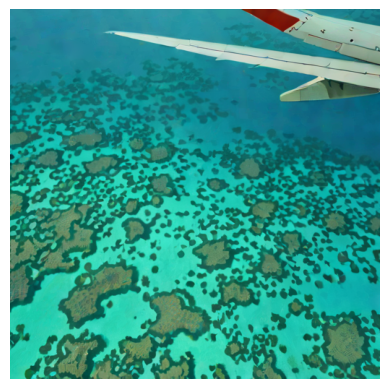

(['car', 'aeroplane'], 'A photo of a car and aeroplane soaring above the runway.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7D3E03A0A910>


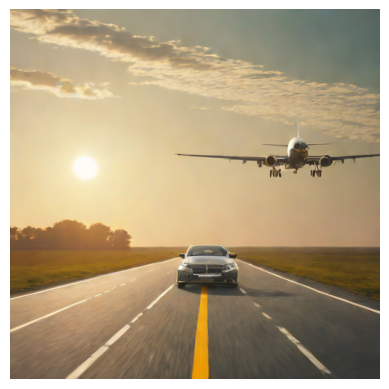

(['aeroplane'], 'A photo of an aeroplane flying over a bustling city, creating an awe-inspiring scene of natures prowess.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7D3E06C48390>


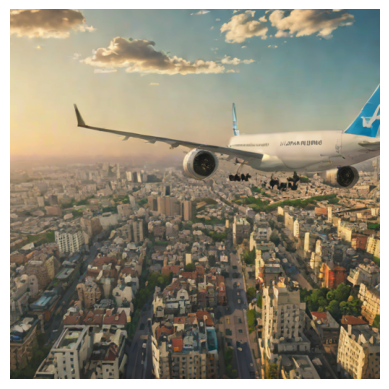

(['aeroplane'], 'A photo of aeroplane mid-flight, soaring above the winding countryside, with the sun setting in the background.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7D3E06C42B90>


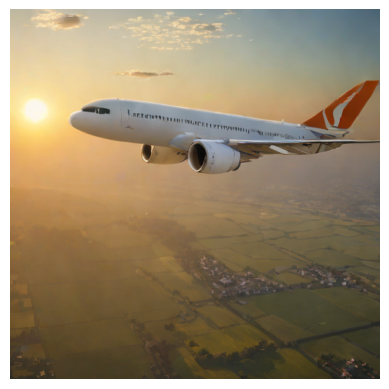

(['car'], 'A photo of a car with a family enjoying a road trip, stop at a scenic overlook enjoying the cool breeze and the sunset.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7D3E02923990>


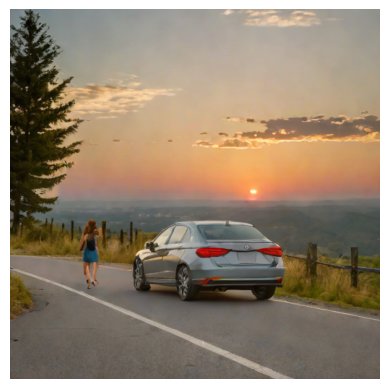

(['aeroplane'], 'A photo of an aeroplane soaring above a busy city skyline.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7D3E02917910>


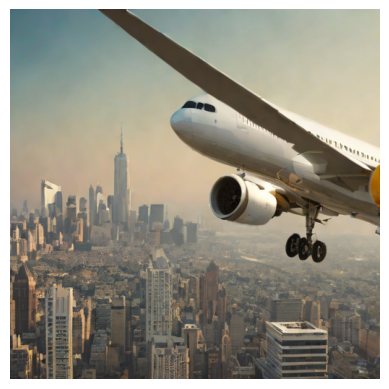

(['unicorn'], 'A photo of a unicorn grazing peacefully in a lush forest, surrounded by tall trees and vibrant flowers. Its like magic has taken over, and the beauty of nature is truly spectacular. This magical creature embodies grace and tranquility, inspiring awe and wonder among those who lay their eyes upon it.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7D3E03FCDC50>


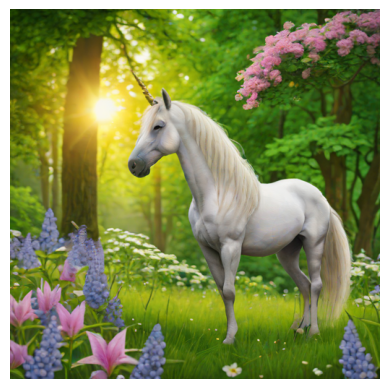

(['person', 'car'], 'A photo of a woman holding a steering wheel, while embracing a child in the back seat of her car. The woman is smiling with joy and comfort, signaling the start of a new adventure.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7D3E028EE010>


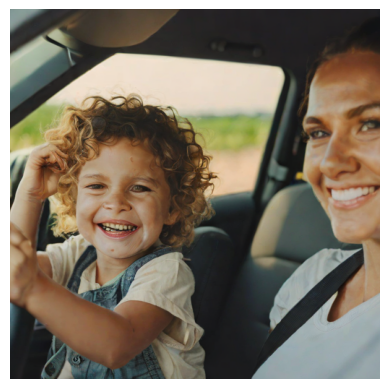

(['car'], 'A photo of a car and a road - A peaceful drive through the open country.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7D3E03983290>


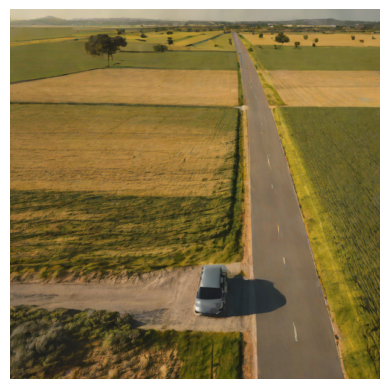

(['aeroplane', 'unicorn'], 'A photo of a soaring aeroplane passing a majestic unicorn grazing in a field below shows the power of human innovation coexisting peacefully with the beauty of nature.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7D3E02655190>


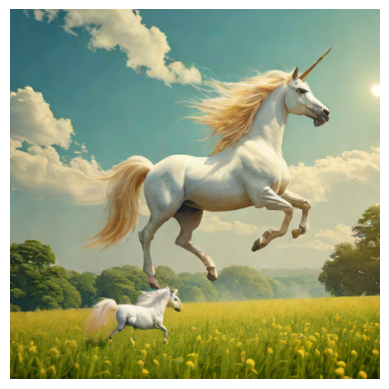

In [8]:
# Visualize images
for img, prompt in zip(generated_images, generated_prompts):
    print(prompt)
    plt.imshow(img)
    print(img)
    plt.axis("off")  # Hide the axis
    plt.show()


In [9]:
image_generator.release(empty_cuda_cache=True)

In [10]:
annotator = OWLv2Annotator(
    seed=42,
    device="cuda",  # Use "cuda" for GPU or "cpu" for CPU
)

2025-02-07 14:32:19.839 | INFO     | datadreamer.dataset_annotation.owlv2_annotator:_init_model:60 - Initializing OWLv2 base model...


Box: [      131.9       1.563      514.62       132.3], Score: 0.8113029599189758, Label: aeroplane


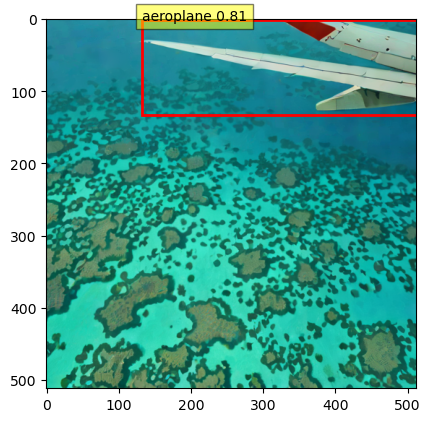

Box: [     228.94      140.45      511.89      233.96], Score: 0.7312925457954407, Label: aeroplane
Box: [     230.82      325.81      317.62      386.43], Score: 0.416578471660614, Label: car


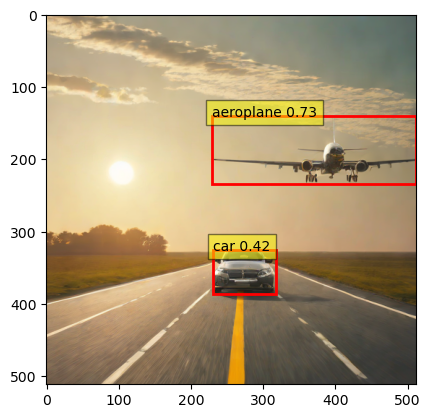

Box: [     87.192      90.393       513.6      251.69], Score: 0.6752041578292847, Label: aeroplane


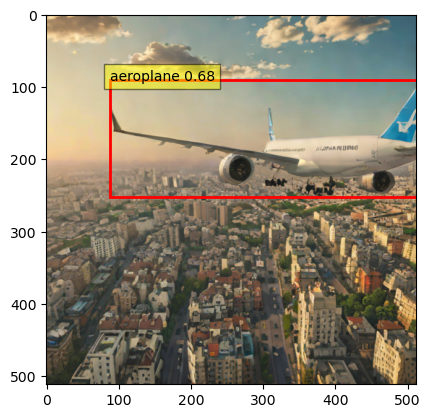

Box: [     83.738      97.774      515.63      228.18], Score: 0.7710450887680054, Label: aeroplane


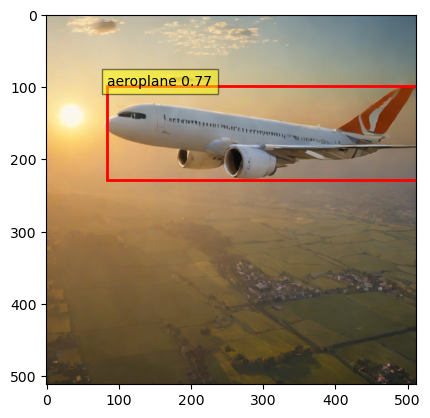

Box: [     169.34      291.75       380.4      404.82], Score: 0.3790394365787506, Label: car


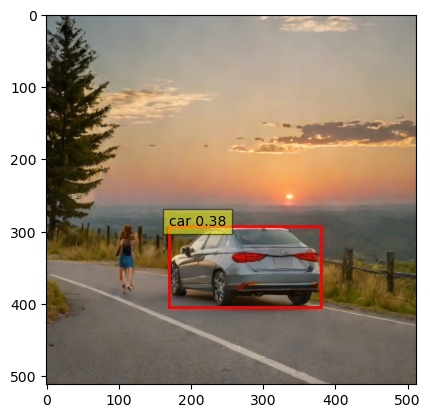

Box: [     98.666      1.4072       514.4      351.28], Score: 0.730976402759552, Label: aeroplane


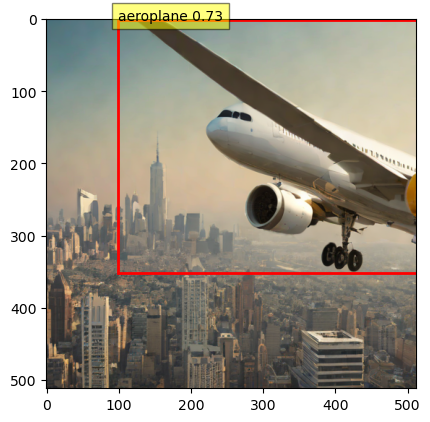

Box: [     166.52      109.47      475.22      465.59], Score: 0.5661645531654358, Label: unicorn


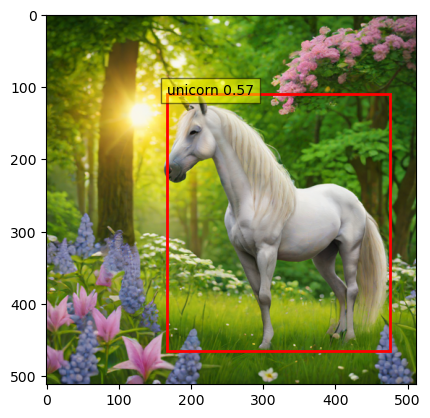

Box: [     2.1407      110.42      286.09       512.9], Score: 0.27922141551971436, Label: person
Box: [     326.85      13.641      508.19      512.48], Score: 0.23764486610889435, Label: person
Box: [     3.2826      5.9108       508.8      507.64], Score: 0.20991936326026917, Label: car


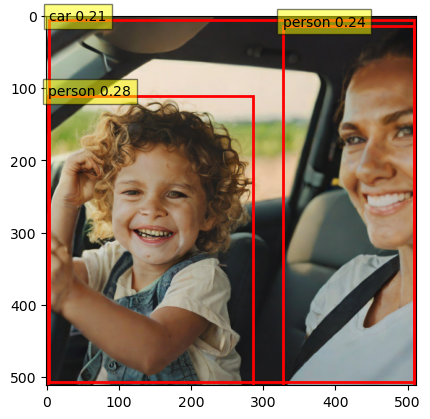

Box: [     255.15      353.59      301.98      425.39], Score: 0.45752888917922974, Label: car


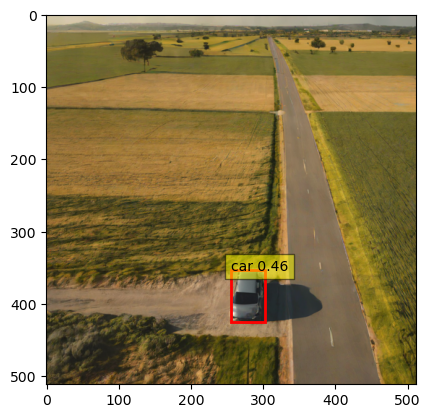

Box: [     85.442      66.732      443.71      389.59], Score: 0.49719852209091187, Label: unicorn
Box: [      104.3      383.51      237.92      465.77], Score: 0.3619500398635864, Label: unicorn


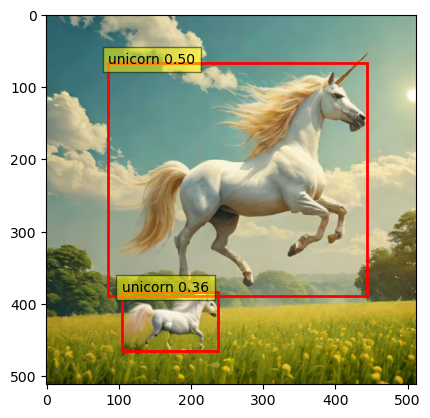

In [11]:
boxes_list = []
scores_list = []
labels_list = []

# Annotate images using OWLv2
for image, prompt_objs in zip(generated_images, prompt_objects):
    # Define prompts to guide the detection
    prompts = prompt_objs

    # Perform object detection
    boxes_batch, scores_batch, labels_batch = annotator.annotate_batch([image], prompts, conf_threshold=0.2, use_tta=True)
    boxes, scores, labels = boxes_batch[0], scores_batch[0], labels_batch[0]

    # Convert to numpy arrays
    if not isinstance(boxes, np.ndarray):
        boxes = boxes.detach().cpu().numpy()
    if not isinstance(scores, np.ndarray):
        scores = scores.detach().cpu().numpy()
    if not isinstance(labels, np.ndarray):
        labels = labels.detach().cpu().numpy()

    # Process the results
    for box, score, label in zip(boxes, scores, labels):
        if isinstance(label, np.int64):
            print(f"Box: {box}, Score: {score}, Label: {prompts[label]}")
        else:
            print(f"Box: {box}, Score: {score}, Label: {label}")


    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # Iterate over each detection
    for box, score, label in zip(boxes, scores, labels):
        # Each box is (x1, y1, x2, y2)
        x1, y1, x2, y2 = box
        width, height = x2 - x1, y2 - y1
        rect = patches.Rectangle(
            (x1, y1), width, height, linewidth=2, edgecolor="r", facecolor="none"
        )
        ax.add_patch(rect)

        if isinstance(label, np.int64):
            label = prompts[label]

        plt.text(
            x1,
            y1,
            f"{label} {score:.2f}",
            bbox=dict(facecolor="yellow", alpha=0.5),
        )

    plt.show()